# Simple Linear Regression (SLR) — Teaching Notebook
**Notation:** \(Y = c + mX\)  (intercept = **c**, slope = **m**)

**CSV layout expected:** First column = **Y**, second column = **X** (`data-set-for-SLR-2025.csv`).

## 1) Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

## 2) Load dataset and preview

In [ ]:
# Y is in the first column, X is in the second column
df = pd.read_csv("/content/drive/MyDrive/IIT Bombay/data-set-for-SLR-2025.csv", header=0)

print("Dataset preview:")
display(df.head())

Dataset preview:


,y,x
0,7.238462,0.025641
1,6.310256,0.051282
2,8.315385,0.076923
3,4.787179,0.102564
4,5.592308,0.128205


## 3) Split into features (X) and target (Y)

In [ ]:
y = df.iloc[:, 0]      # dependent variable (Y)
X = df.iloc[:, [1]]     # independent variable (X) — keep 2D for sklearn
print("Shapes -> X:", X.shape, " | y:", y.shape)

Shapes -> X: (99, 1)  | y: (99,)


## 4) Train Linear Regression model and get coefficients (c and m)

In [ ]:
model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]      # slope
c = model.intercept_    # intercept

print("Equation:  Y = c + mX")
print("Slope (m):", m)
print("Intercept (c):", c)

Equation:  Y = c + mX
Slope (m): 5.4522411867631675
Intercept (c): 5.9225864088354525


## 5) Make predictions on the same data (for demonstration)

In [ ]:
y_pred = model.predict(X)
print("First 5 predictions:", y_pred[:5])

First 5 predictions: [6.06238747 6.20218852 6.34198958 6.48179064 6.62159169]


## 6) Evaluate model performance (R², MAE, RMSE)

In [ ]:
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R²: 0.8213255858465578
MAE: 1.5668828436600342
RMSE: 1.863401214766802


## 7) Plot actual data and regression line

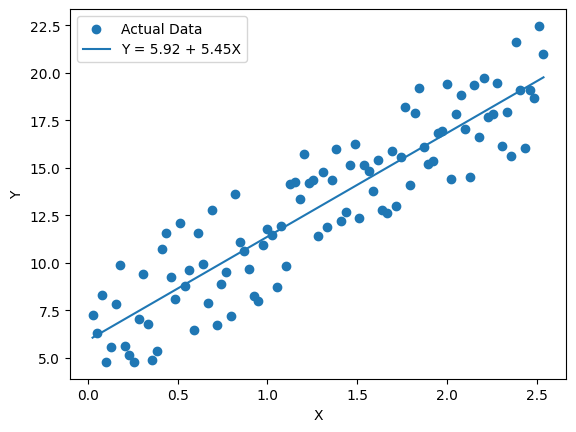

In [ ]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred, label=f"Y = {c:.2f} + {m:.2f}X")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## 8) Statsmodels OLS summary (detailed inference like Excel)

In [ ]:
X_sm = sm.add_constant(X)   # adds intercept term (c)
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     445.9
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           4.72e-38
Time:                        14:40:07   Log-Likelihood:                -202.09
No. Observations:                  99   AIC:                             408.2
Df Residuals:                      97   BIC:                             413.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9226      0.381     15.533      0.0

In [ ]:
import numpy as np
from statsmodels.stats.stattools import jarque_bera, omni_normtest, durbin_watson

def regression_health_report(ols_model, X_sm, name="Model"):
    """
    Prints a compact diagnostics report for a fitted statsmodels OLS result.

    Parameters
    ----------
    ols_model : statsmodels.regression.linear_model.RegressionResultsWrapper
        The fitted OLS results object (e.g., from sm.OLS(...).fit()).
    X_sm : pandas.DataFrame or np.ndarray
        The exact design matrix used to fit the model (including the intercept column added by sm.add_constant).
    name : str
        Label printed at the top of the report.
    """
    # Basic fits
    r2 = ols_model.rsquared
    r2_adj = ols_model.rsquared_adj
    f_p = ols_model.f_pvalue

    # Residual diagnostics
    resid = ols_model.resid
    jb_stat, jb_p, skew, kurtosis = jarque_bera(resid)
    omni_stat, omni_p = omni_normtest(resid)
    dw = durbin_watson(resid)

    # Condition number (numerical stability / collinearity signal)
    # Use the raw matrix values for the conditioning calculation.
    X_vals = X_sm.values if hasattr(X_sm, "values") else np.asarray(X_sm)
    cond_no = np.linalg.cond(X_vals)

    # Print report
    print(f"=== {name} : Diagnostics Health Report ===")
    print(f"R²                : {r2:.4f}   (0–1, higher better)")
    print(f"Adj. R²           : {r2_adj:.4f}   (use for comparing models with different #features)")
    print(f"Prob(F-statistic) : {f_p:.4g}   (< 0.05 suggests model is informative overall)")
    print()
    print("Residual Normality:")
    print(f"  Jarque–Bera p   : {jb_p:.4g}   (> 0.05 → residuals roughly normal)")
    print(f"  Omnibus p       : {omni_p:.4g}   (> 0.05 → residuals roughly normal)")
    print(f"  Skew            : {skew:.3f}    (~0 ideal)")
    print(f"  Kurtosis        : {kurtosis:.3f} (≈3 ideal)")
    print()
    print("Autocorrelation:")
    print(f"  Durbin–Watson   : {dw:.3f}    (~2 ideal; <2 positive AC, >2 negative AC)")
    print()
    print("Numerical Stability / Collinearity:")
    print(f"  Condition No.   : {cond_no:.1f}  (<10 good, >30 caution, >100 serious)")
    print("==============================================")


In [ ]:
regression_health_report(ols_model, X_sm, name="SLR: Y = c + mX")

=== SLR: Y = c + mX : Diagnostics Health Report ===
R²                : 0.8213   (0–1, higher better)
Adj. R²           : 0.8195   (use for comparing models with different #features)
Prob(F-statistic) : 4.723e-38   (< 0.05 suggests model is informative overall)

Residual Normality:
  Jarque–Bera p   : 0.1188   (> 0.05 → residuals roughly normal)
  Omnibus p       : 0.0006406   (> 0.05 → residuals roughly normal)
  Skew            : 0.021    (~0 ideal)
  Kurtosis        : 1.985 (≈3 ideal)

Autocorrelation:
  Durbin–Watson   : 2.100    (~2 ideal; <2 positive AC, >2 negative AC)

Numerical Stability / Collinearity:
  Condition No.   : 4.1  (<10 good, >30 caution, >100 serious)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
